<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p2/blob/working_filep2/project2_wine_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Cluster wines based on their chemical constituents

**Objective** The objective of this study is to use cluster analysis to discover natural grouping of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. We use the Wine Dataset from kaggle for Clustering: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering. This is a modified version of the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing information about the types of wines. We will use the second Data Set for validation in our prediction.

#Install Packages and Load in Dataset


In [ ]:
!pip install pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip3 install pandas_profiling 
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-1-150aec45f8b7>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


#Importing the Dataset

In [ ]:
df_path = 'https://github.com/DeepCodeSec/ml1000-p2/blob/27e9bc2cb360cf168169164d4b5e781a8089298a/data/wine-clustering.csv?raw=true'

In [ ]:
#load csv into dataframe
import pandas as pd

dataset = pd.read_csv(df_path, sep=',')

dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The code below automatically creates an exploratory data analysis report which is output as an html file in the local files. What follows are the highlights of this EDA report: 

#Exploratory Data Analysis

In [ ]:
#Load libraries for exploratory analysis
pr = ProfileReport(dataset)
pr.to_file(output_file="EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#see a details about the data
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [ ]:
#check the shape of data
dataset.shape

(178, 13)

In [ ]:
#basic structure of dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
#see number of missing values for each column
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
dataset.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

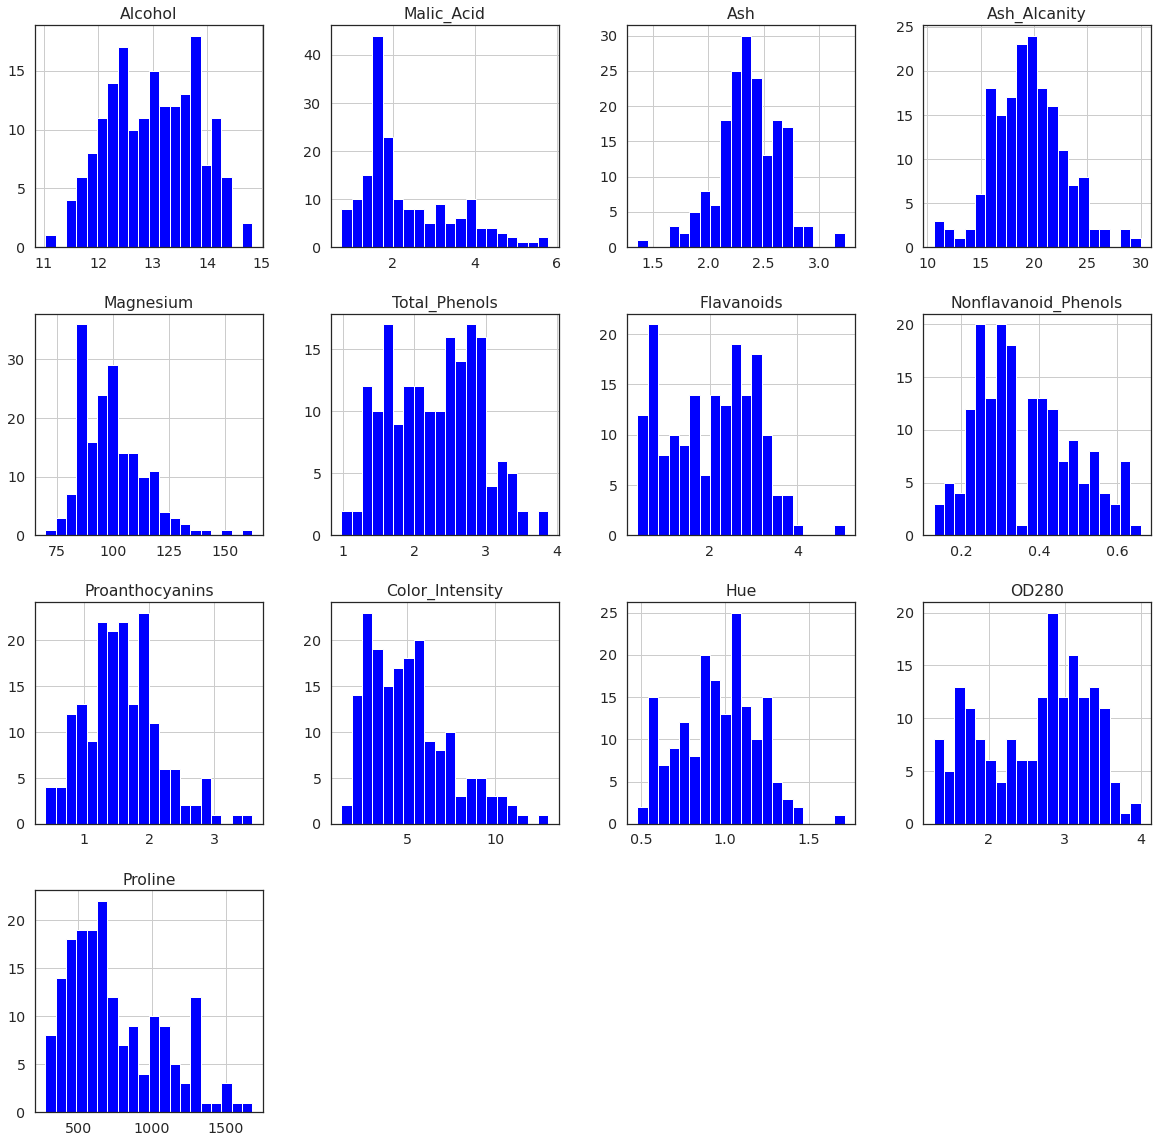

In [ ]:
#ploting histograms to better visualize the distributions of every feature for better insights
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=dataset.hist(bins=20,color='blue' )

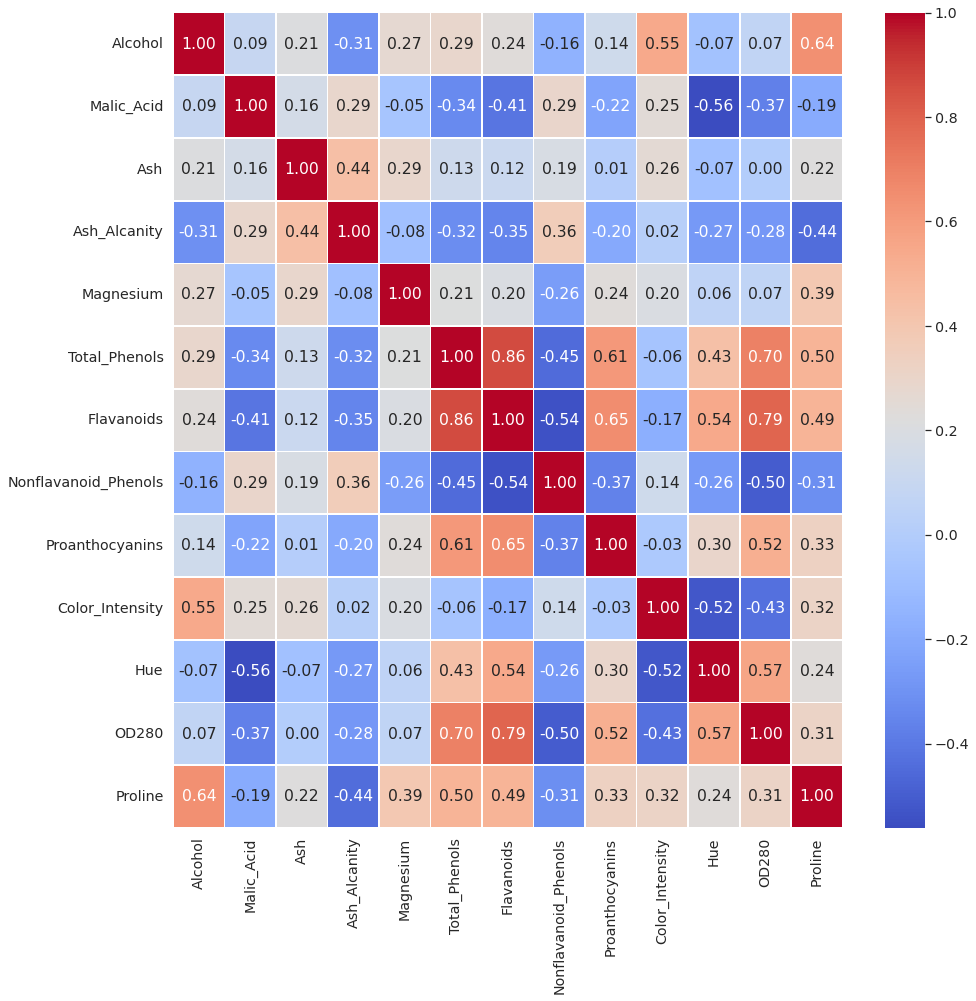

In [ ]:
#Doing correaltion analysis 
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,fmt=".2f",linewidths=0.7,cmap="coolwarm")
plt.show()

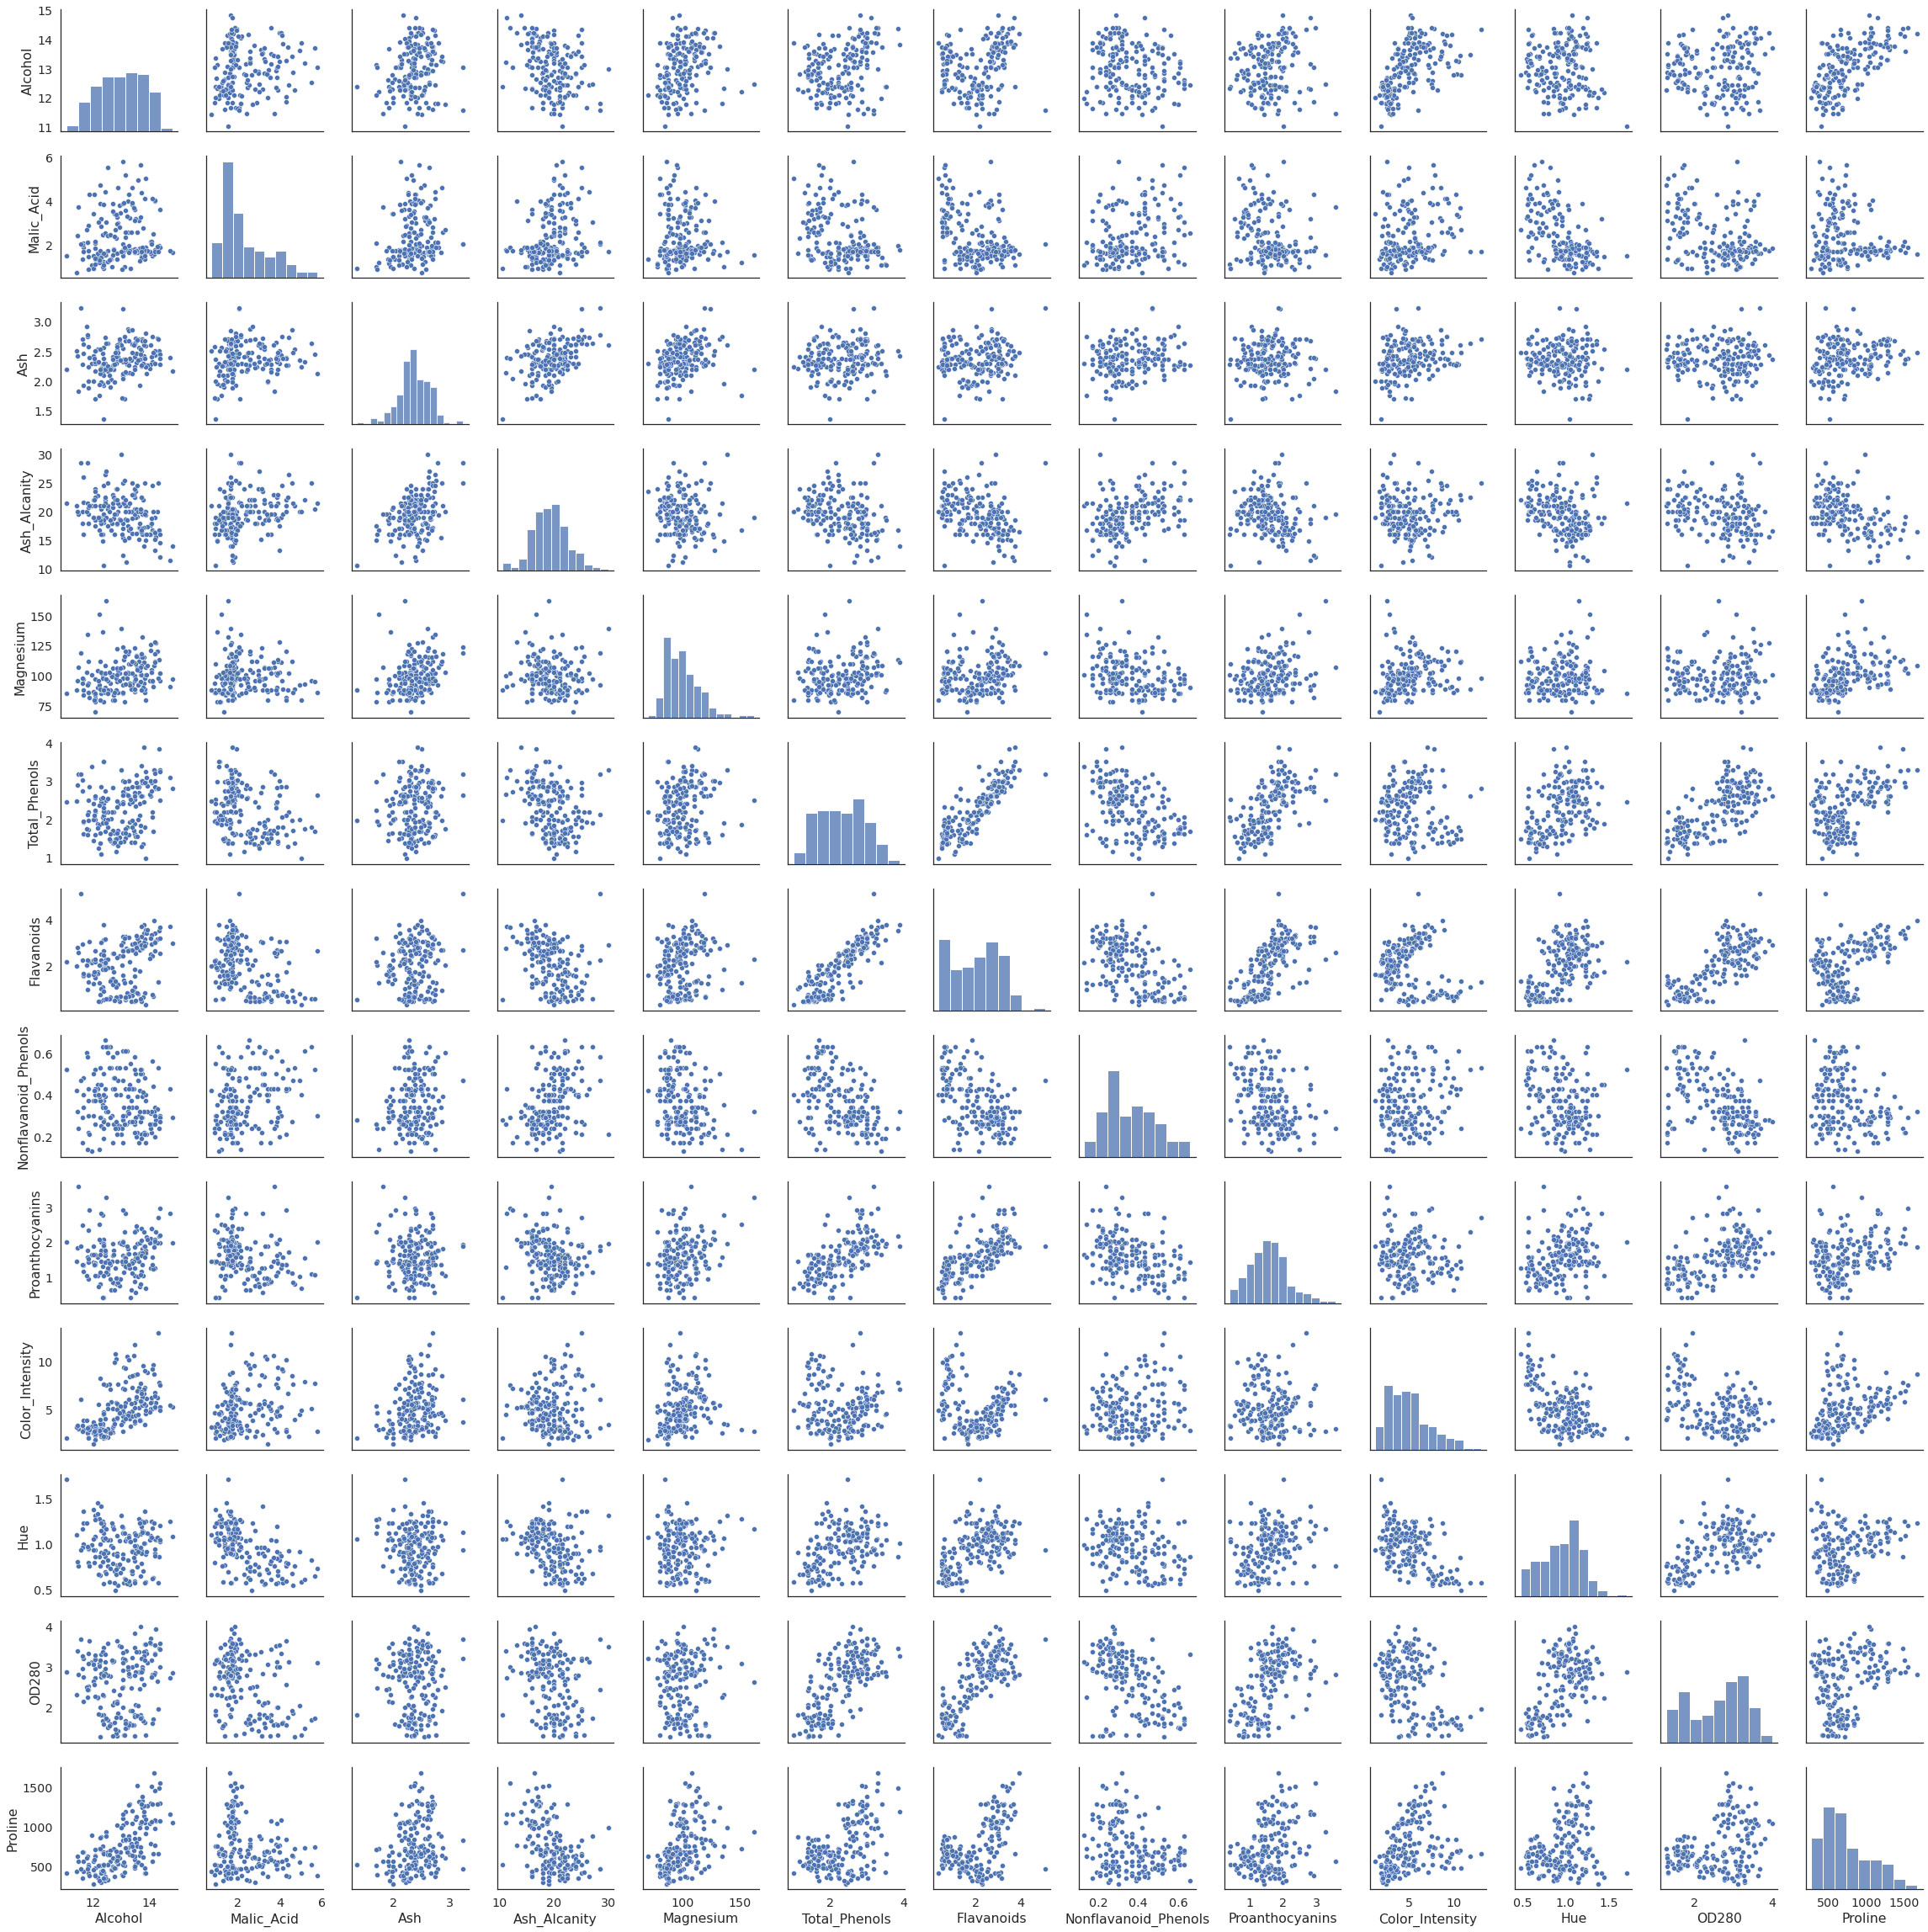

In [ ]:
#create the default pairplot
sns.pairplot(dataset)
plt.show()

**Summary of Data**

* 13 variables
* 178 observations
* No missing values
* High Correlations:
> * Alcohol is highly correlated with Color_Intensity and Proline
> * Malic_Acid is highly correlated with Hue
> * Magnesium is highly overall correlated with Proline
> * Total_Phenols is highly overall correlated with Flavanoids, Proanthocyanins and OD280
> * Flavanoids is highly overall correlated with Total_Phenols, Nonflavanoid_Phenols, Proanthocyanins and OD280.
> * Nonflavanoid_Phenols is highly overall correlated with Flavanoids
> * Proanthocyanins is highly overall correlated with Total_Phenols, Flavanoids and OD280
> * Color_Intensity is highly overall correlated with Alcohol
> * Hue is highly overall correlated with Malic_Acid and Flavanoids
> * OD280 is highly overall correlated with Total_Phenols, Flavanoids and Proanthocyanins
> * Proline is highly overall correlated with Magnesium
* There are widely different ranges. On one extreme, Nonflavanoid_Phenols has a range of Nonflavanoid_Phenols of 0.13 - 0.66, while Proline has a range of 278 - 1680.

A sample of 5% (9 records) has been withheld from the original dataset to be used for predictions at the end of the experiment.

In [ ]:
# Split the data into 95% and 5%
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (169, 13)
Unseen Data For Predictions: (9, 13)


In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
1,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
2,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
3,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466
4,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120


In [ ]:
data_unseen.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
3,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
4,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415


## Data Cleaning

Here we make our data cleaning decisions. The data does not contain any missing values, so no imputation or row removal was needed. Exploratory data analysis revealed the numeric features have varying scales and several are non-normally distributed. We will address both in the experiment setup section. Finally, we need to check the data for outliers.

### Outlier analysis

Two options: 
1.   When lots of observations in dataset and only a few rows with outlier values (for any column), just remove rows containing outliers. Alternatively, we leave the feww outliers as is because they may be potentially informative.

2.   When fewer observations and more rows containing outlier values, cap the values at the 5th and 95th percentiles.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


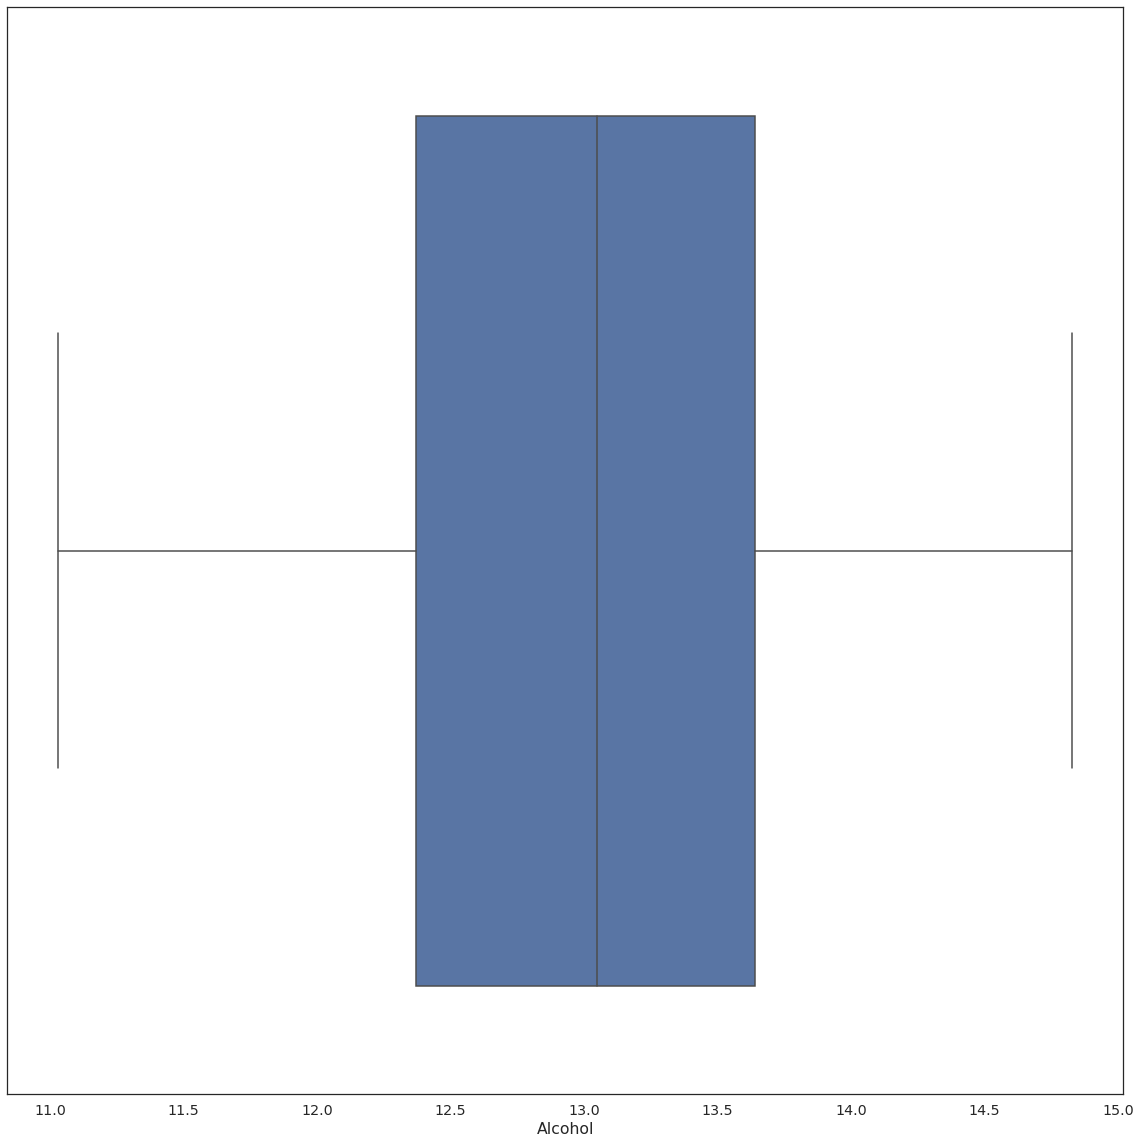

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


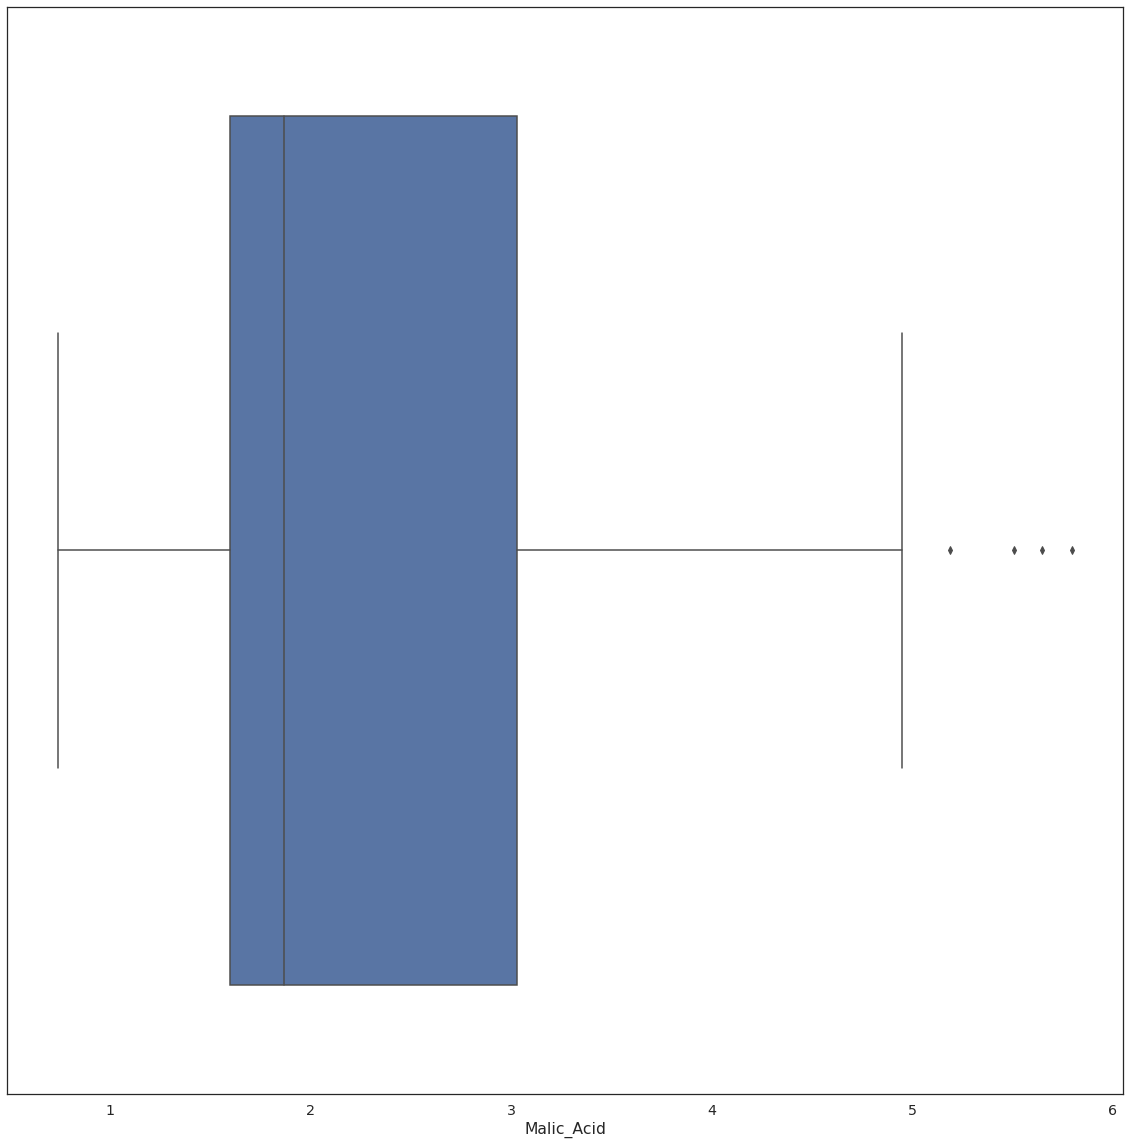

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


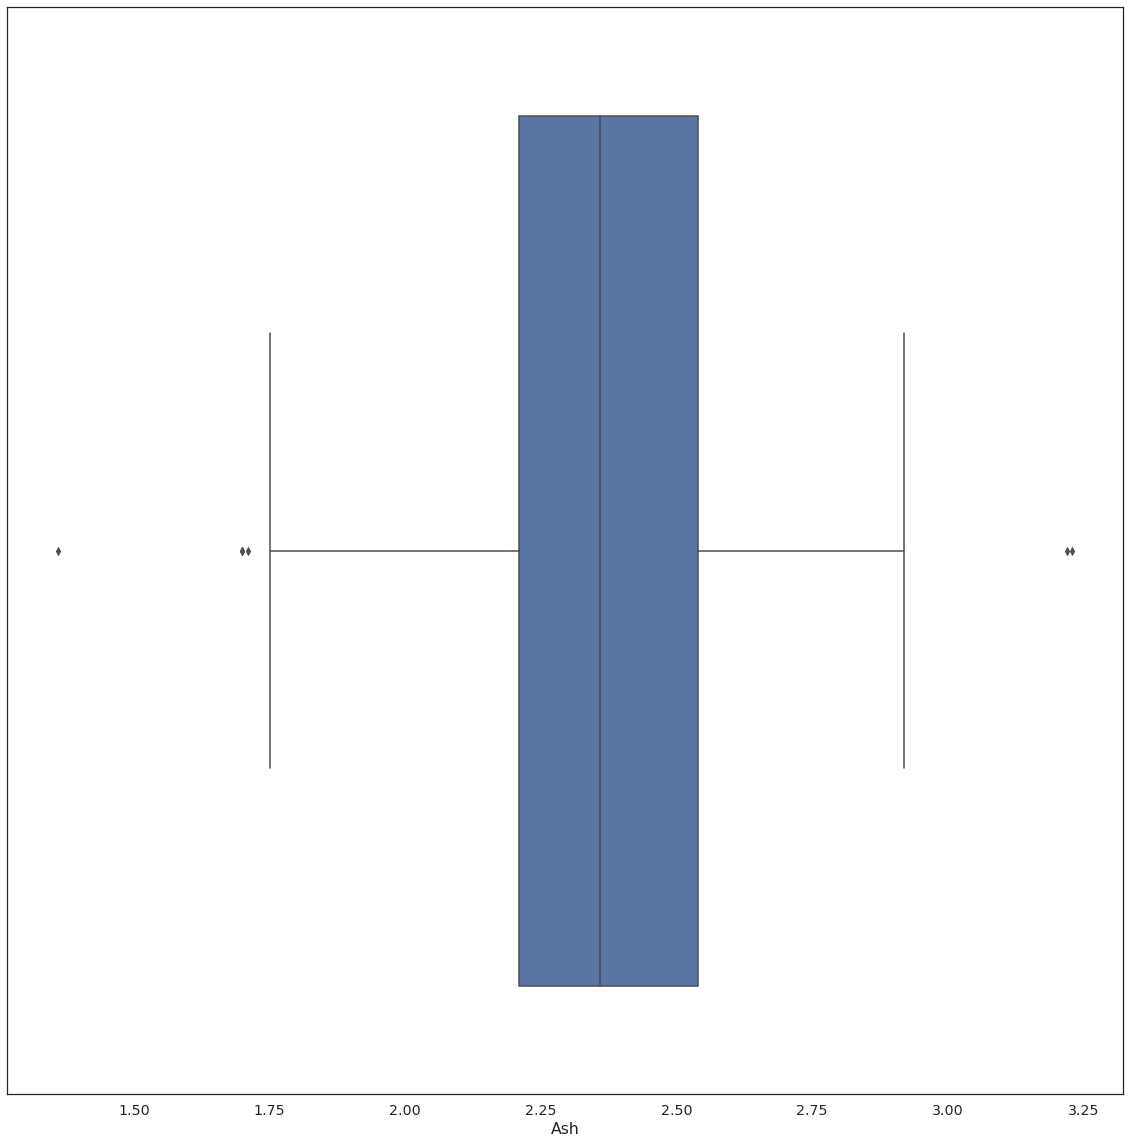

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


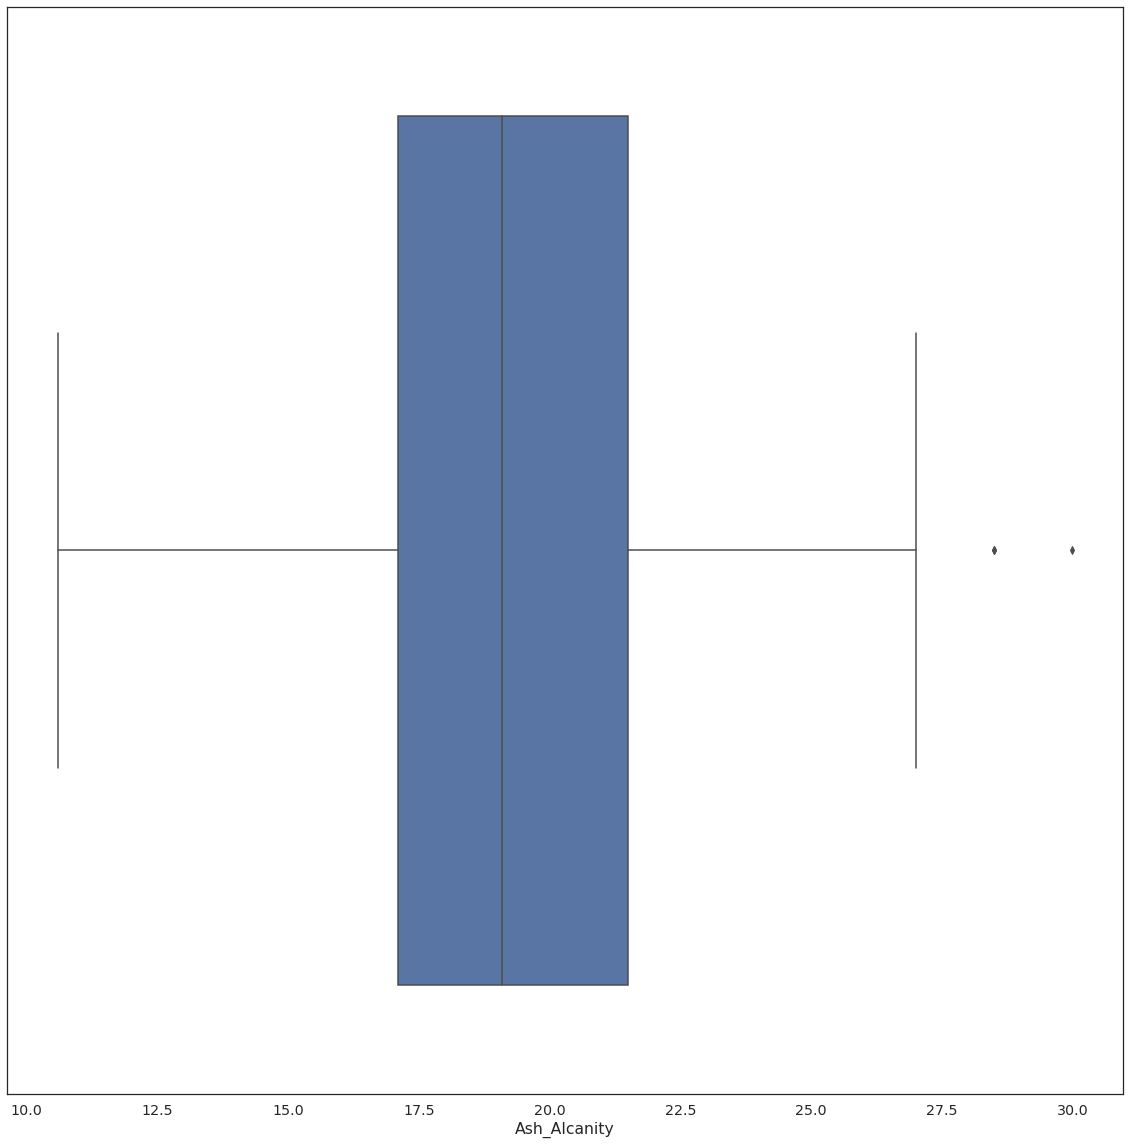

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


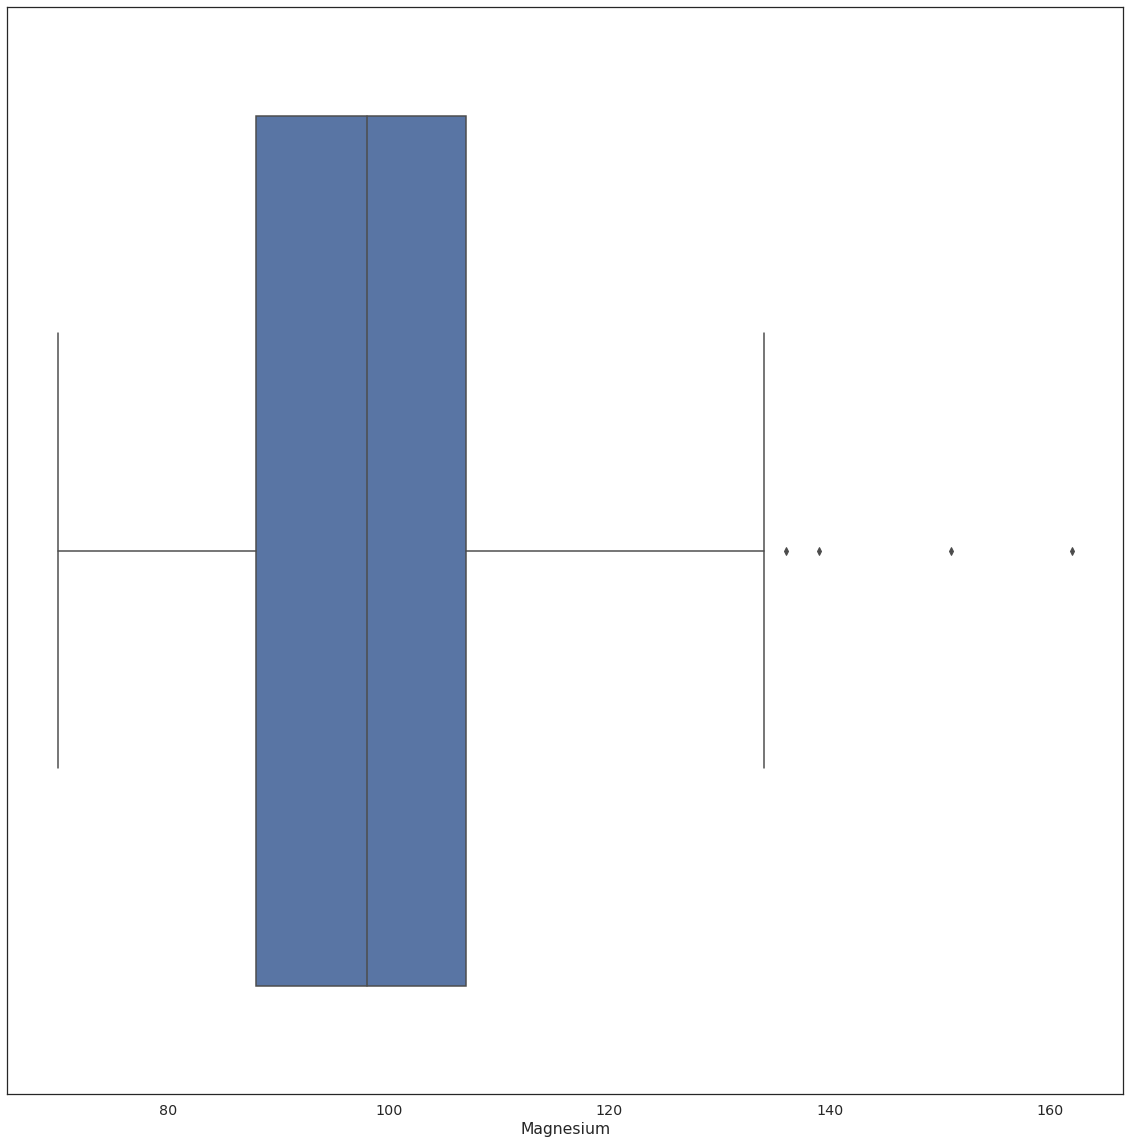

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


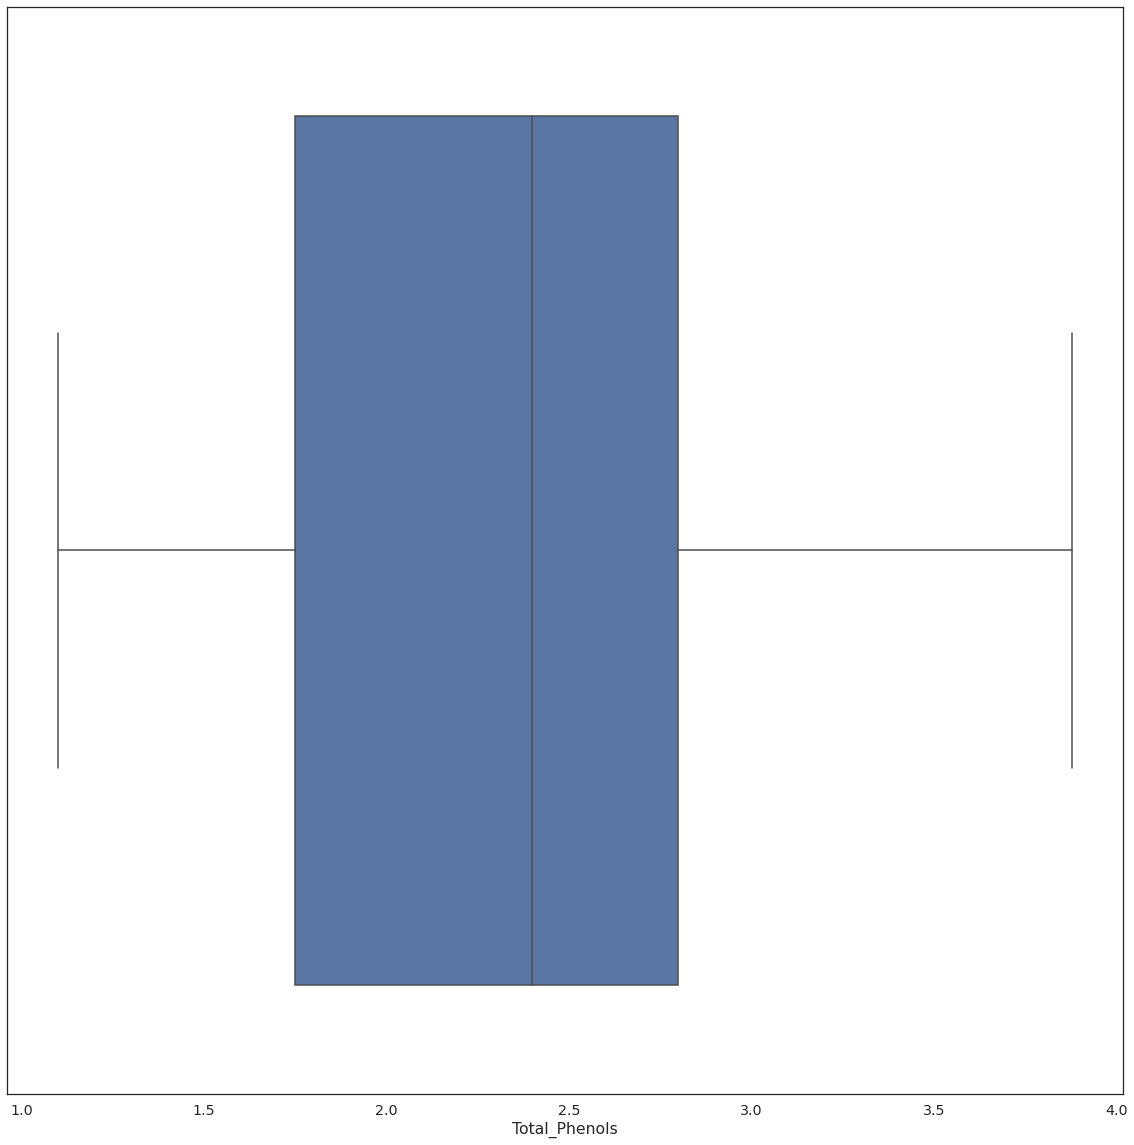

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


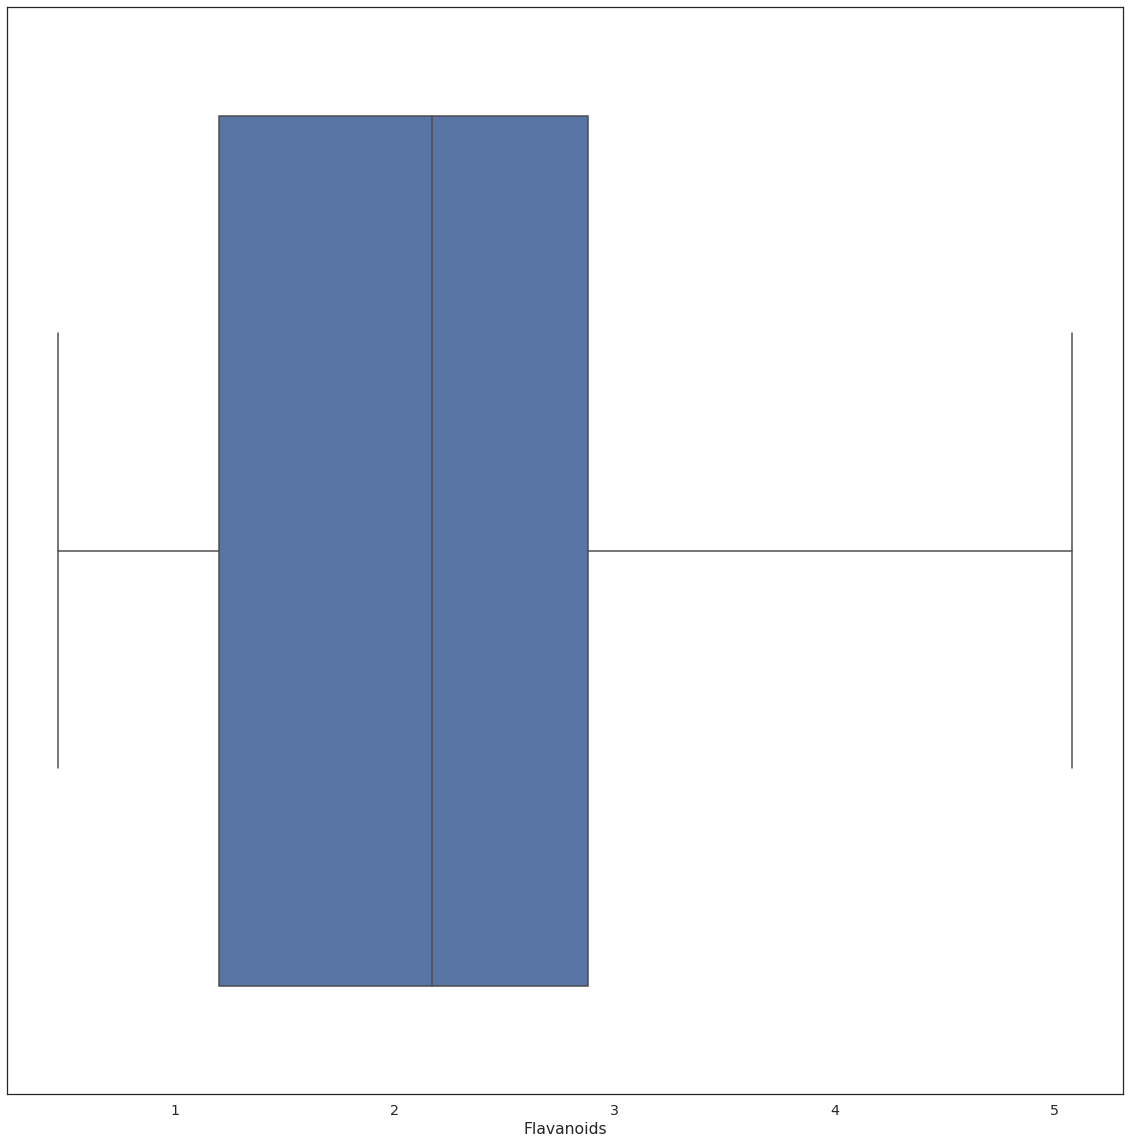

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


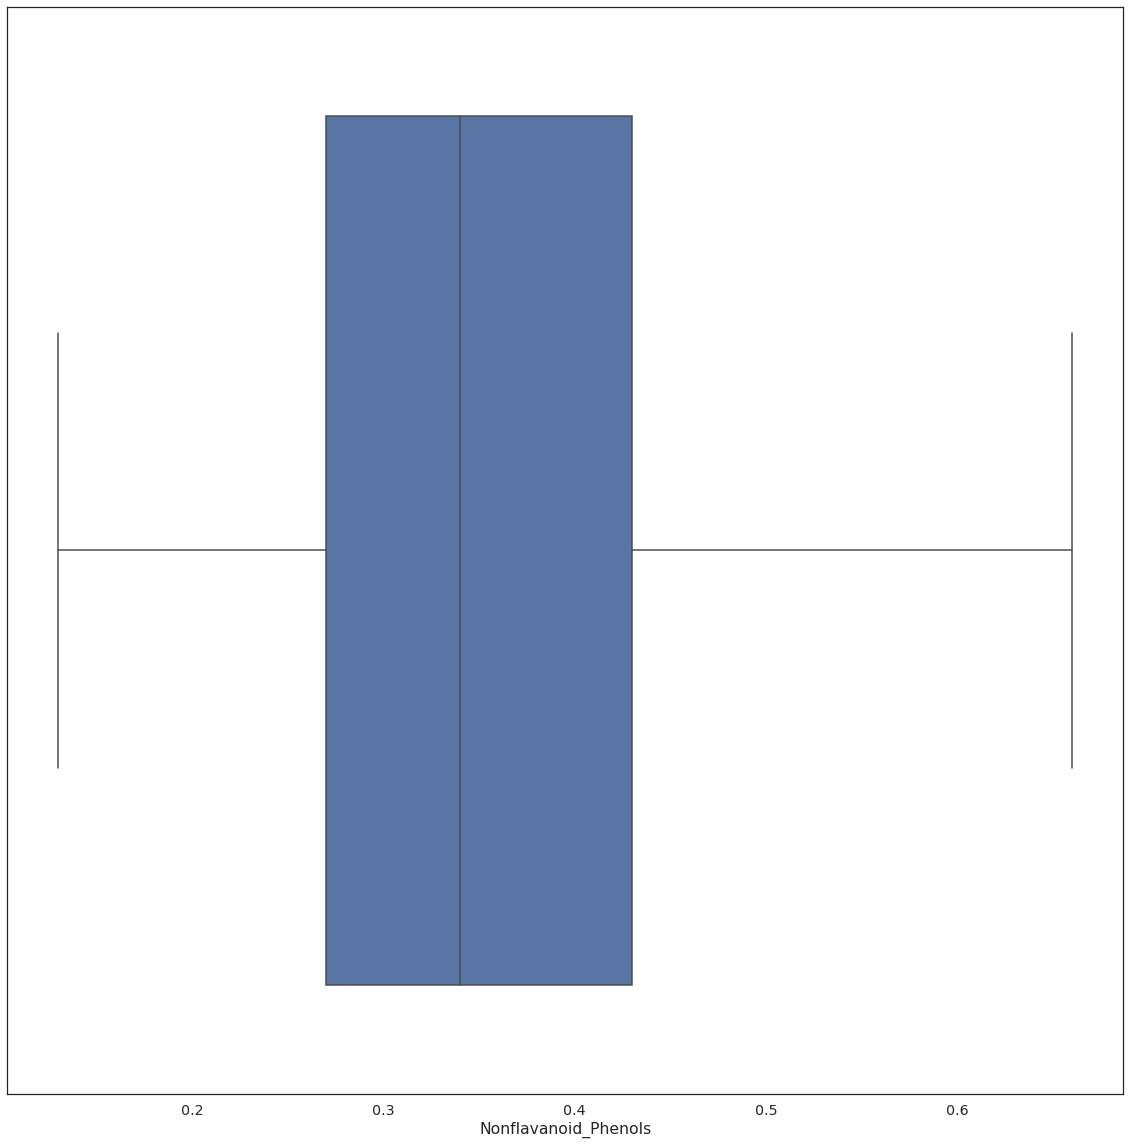

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


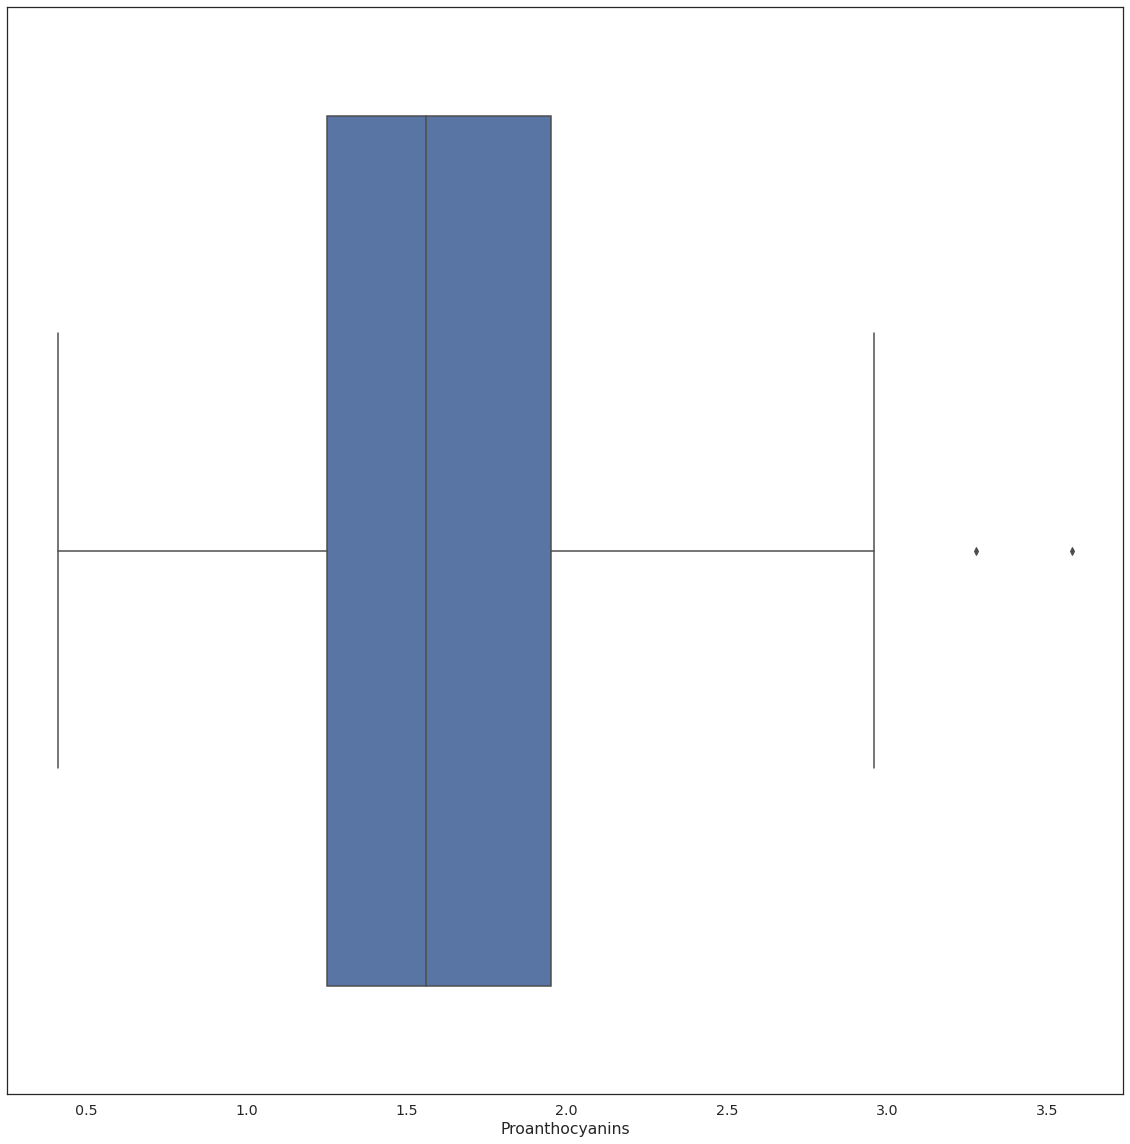

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


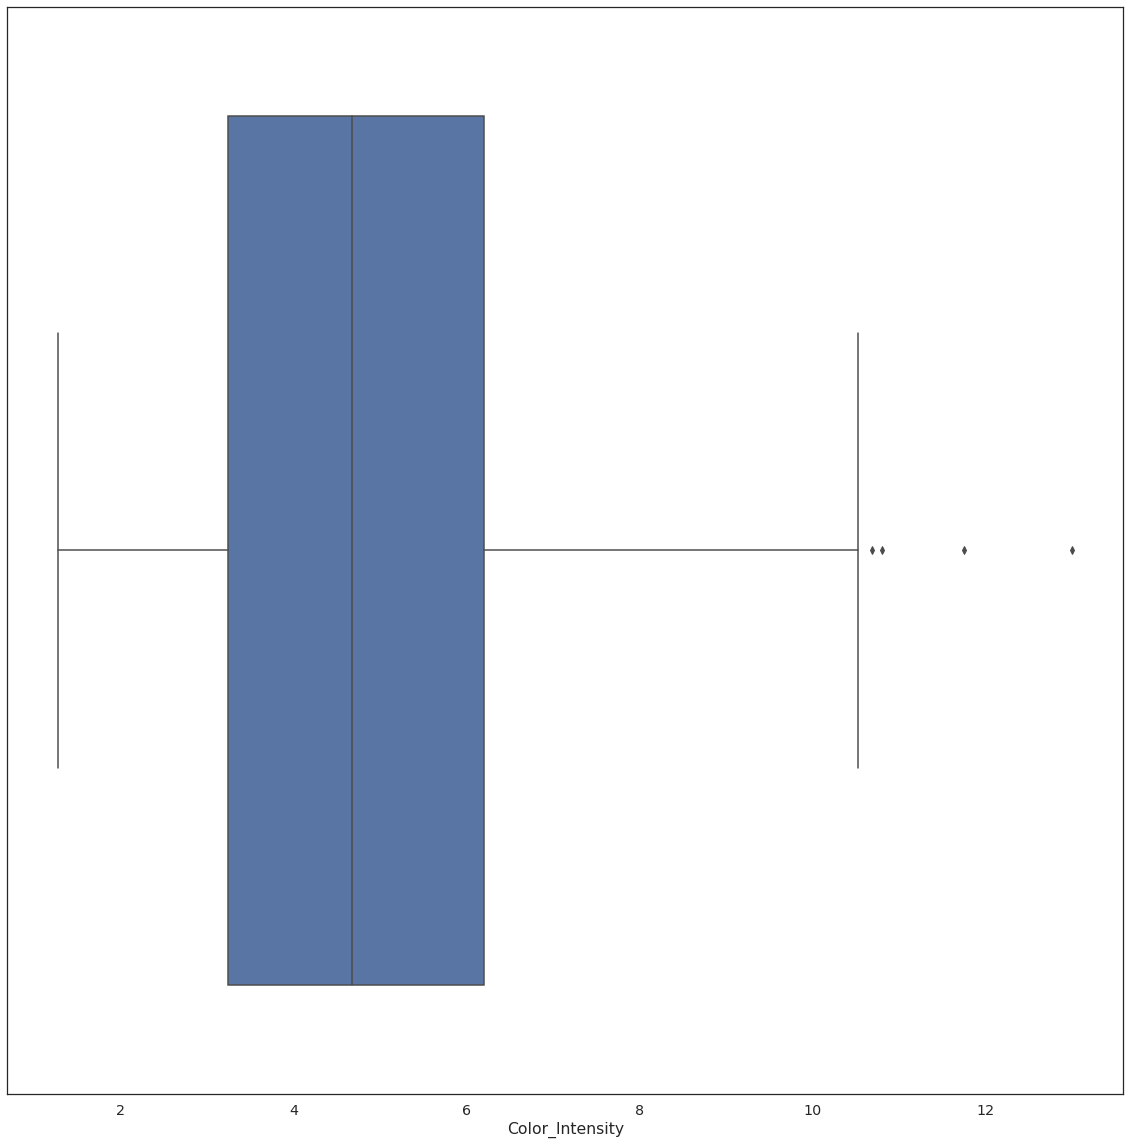

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


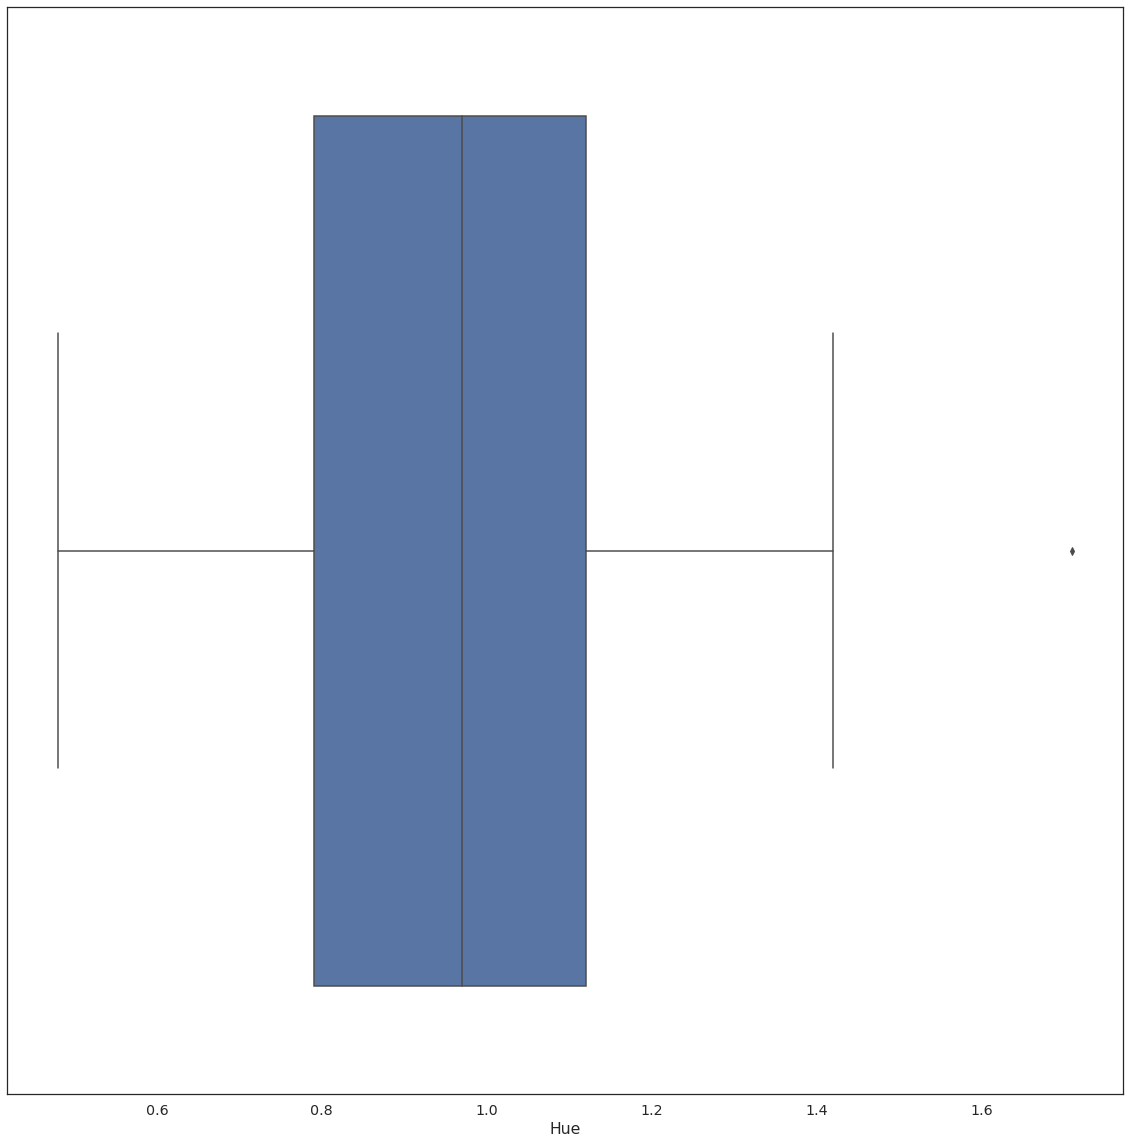

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


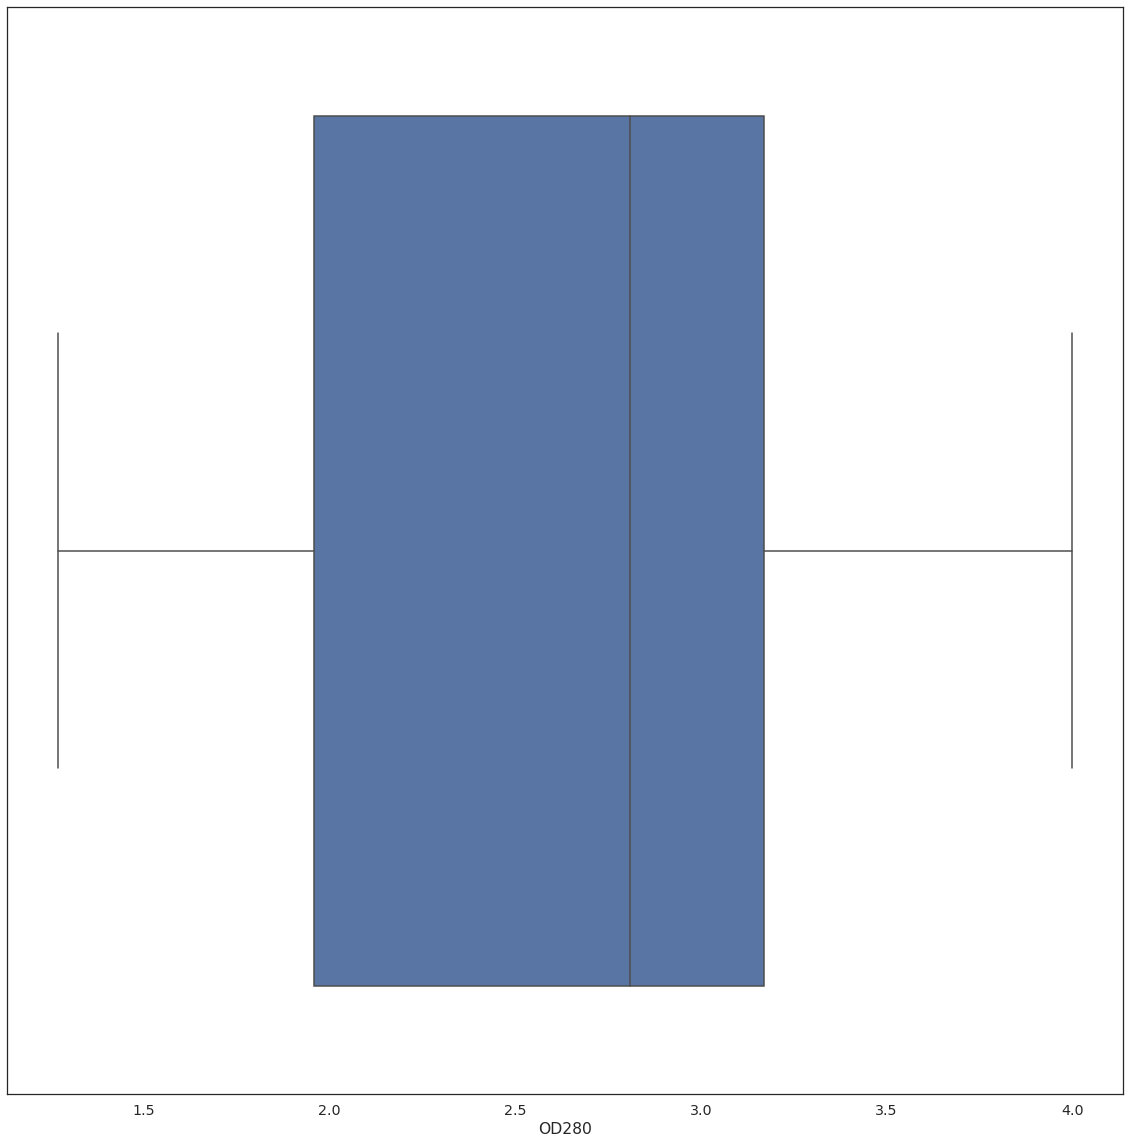

In [ ]:
# Outlier analysis
cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  plt.figure()
  sns.boxplot(data[col])
  plt.show()

The boxplots indicate half of our preditors contain outliers. Since there are only 169 records in our training dataset, removing rows that contain outliers could leave us with a very small fraction of the original data. We opt to cap the values at the 5th and 95th percentiles to retain as much data as possible.

In [ ]:
tmp = data #creating a temporary to avoid accidentally overwriting the original (let's us compare and verify capping)
data_clean = data

In [ ]:
cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-13) to show outliers
for col in cols[0:-1]:
  upper_limit = tmp[col].mean() + 3*tmp[col].std() #~95th percentile
  lower_limit = tmp[col].mean() - 3*tmp[col].std() #~5th percentile
  
  data_clean[col] = np.where(tmp[col]> upper_limit, upper_limit, #if above 95th, set to upper
                        np.where(tmp[col]< lower_limit, lower_limit, #if below 5th, set to lower
                        tmp[col]))


In [ ]:
#Capped distributions. Verify by checking max and min
data_clean.describe() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,12.996746,2.329872,2.363682,19.381361,99.631951,2.310118,2.043367,0.360947,1.596123,5.055492,0.956524,2.626805,754.952663
std,0.804423,1.106649,0.269297,3.309595,13.586496,0.619726,1.001279,0.125291,0.570794,2.292994,0.221570,0.702936,315.095352
min,11.030000,0.740000,1.540073,10.600000,70.000000,1.100000,0.470000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.600000,2.210000,17.100000,88.000000,1.750000,1.200000,0.270000,1.250000,3.250000,0.790000,1.960000,510.000000
50%,13.050000,1.870000,2.360000,19.100000,98.000000,2.400000,2.170000,0.340000,1.560000,4.680000,0.970000,2.810000,678.000000
75%,13.640000,3.030000,2.540000,21.500000,107.000000,2.800000,2.880000,0.430000,1.950000,6.200000,1.120000,3.170000,990.000000
max,14.830000,5.658413,3.186081,29.350019,142.399848,3.880000,5.049053,0.660000,3.324766,11.998209,1.626500,4.000000,1680.000000


# Training clustering models
Now that the data is clean, we can set up the clustering experiment pipeline. We address some final data cleaning issues in the experiment setup. For example, the values of the Nonflavanoid_Phenols column ranges from 0.13 - 0.66 while Proline ranges from 278 - 1680. This impacts performance on certain clustering algorithms such as k-means, therefore we choose to z-score normalize the features to put them all on the same scale. This is specified in the 'normalize=True' argument. Second, we use the 'transformation=True' argument to transform the features into a more Gaussian (normal) distribution. Next, we address the multicollinearity in the data using the 'remove_multicollinearity' argument. The threshold for multicollinearity was set to 0.7. Inter-correlated features that exceeded the 0.7 threshold were removed, and when two features are highly correlated with each other (for example, Flavanoids and Total_Phenols) the feature that is least correlated with the target variable is removed.

In [ ]:
from pycaret.clustering import *

exp_P2cls = setup(data = data_clean, #make sure to use cleaned data (outliers capped)
                   session_id = 123,
                   transformation=True, #applies the power transform to make data more Gaussian-like
                   normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
                   remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed
                   multicollinearity_threshold = 0.7, #by default was 0.9
                )

,Description,Value
0,session_id,123
1,Original Data,"(169, 13)"
2,Missing Values,False
3,Numeric Features,13
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(169, 11)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select

# Display a list of Models

In [ ]:
models()

INFO:logs:gpu_param set to False


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


# Determine the optimal number of clusters for k-means clustering
We used the method described by Tola Alade to determine the number of possible clusters and see if it differed from 3 https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [ ]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
mms = MinMaxScaler()
mms.fit(dataset)
data_transformed = mms.transform(dataset)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

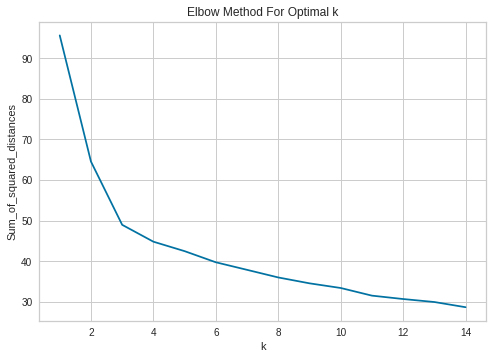

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the Elbow Method we will use 3 clusters going forward.

# Create a Model

In [ ]:
kmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2881,60.6503,1.3794,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


# Assign a Model

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(169, 14)
INFO:logs:assign_model() succesfully completed......................................


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,Cluster 1
1,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625,Cluster 1
2,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970,Cluster 0
3,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,Cluster 1
4,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120,Cluster 0


# Plot a Model

In [ ]:
plot_model(kmeans)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


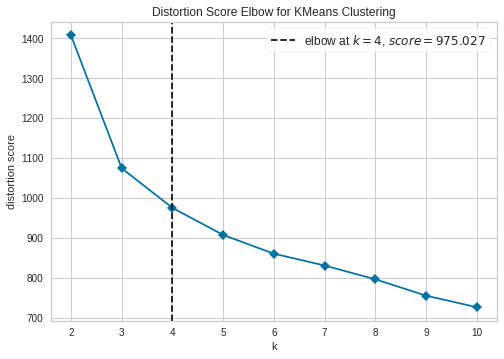

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans, plot = 'elbow')

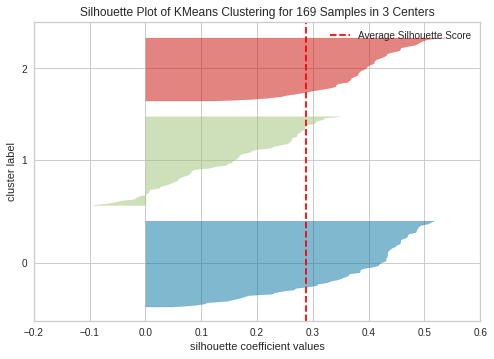

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


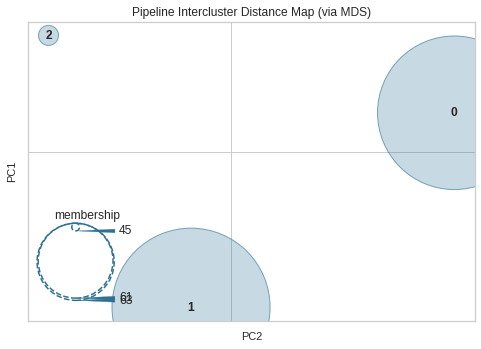

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans, plot = 'distance')

In [ ]:
plot_model(kmeans, plot = 'tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


# Predict on unseen data
As a demonstration of how the model works, we predict the quality of wines in the 5% holdout data that we removed at the begining of the notebook before feature engineering.

In [ ]:
# 5% sample witheld in the beginning
data_unseen.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
3,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
4,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415


In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), ml_usecase=MLUsecase.CLUSTERING)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,Cluster 0
1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,Cluster 0
2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,Cluster 1
3,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562,Cluster 1
4,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415,Cluster 1
5,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,Cluster 1
6,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,Cluster 2
7,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,Cluster 2
8,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,Cluster 2


Our predictions yielded a 100% accuracy when comparing with our second Data Set.

# Saving the model

In [ ]:
#save model
save_model(kmeans,'kmeans_final_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), model_name=kmeans_final_pipeline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
              

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  Fix_multicollinearity(correlation_with_target_preference=None,
                                        correlation_with_target_threshold=0.0,
                                        target_variable='UNSUPERVISED_DUMMY_TARGET',
                                        threshold=0.7)),
     

# Conclusions
The kmeans algorithm had a 100% accurracy in the prediction stage therefore we did not investigate other algorithms.